**Understand in details the SVM classification technique. Apply it on the loan dataset using three different types of kernel and compare the performances. Prepare a few slides to present your results.**

**Importing Libraries**

In [73]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.pipeline import make_pipeline
     

Importing Dataset

In [74]:
# Read the loan excel file
loan_data=pd.read_excel('loan-2.xlsx')      
# Displaying information from the data                              
print(loan_data.shape)                                                           
print(loan_data.info())                                                 
loan_data.head()

(428, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              428 non-null    object 
 1   Age              428 non-null    float64
 2   Time_at_address  428 non-null    float64
 3   Res_status       428 non-null    object 
 4   Telephone        428 non-null    object 
 5   Occupation       428 non-null    object 
 6   Job_status       428 non-null    object 
 7   Time_employed    428 non-null    int64  
 8   Time_bank        428 non-null    int64  
 9   Liab_ref         428 non-null    object 
 10  Acc_ref          428 non-null    object 
 11  Home_Expn        428 non-null    int64  
 12  Balance          428 non-null    int64  
 13  Decision         428 non-null    object 
dtypes: float64(2), int64(4), object(8)
memory usage: 46.9+ KB
None


,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [75]:
loan_data.isnull().sum()

Sex                0
Age                0
Time_at_address    0
Res_status         0
Telephone          0
Occupation         0
Job_status         0
Time_employed      0
Time_bank          0
Liab_ref           0
Acc_ref            0
Home_Expn          0
Balance            0
Decision           0
dtype: int64

In [76]:
# Checking correlation among the columns in the data
correlation=loan_data.corr()                                                      
print(correlation)

                      Age  Time_at_address  Time_employed  Time_bank  \
Age              1.000000         0.216971       0.426678   0.208414   
Time_at_address  0.216971         1.000000       0.278174   0.201335   
Time_employed    0.426678         0.278174       1.000000   0.290993   
Time_bank        0.208414         0.201335       0.290993   1.000000   
Home_Expn       -0.072460        -0.268066      -0.111331  -0.112159   
Balance          0.101662         0.071895       0.112452   0.153187   

                 Home_Expn   Balance  
Age              -0.072460  0.101662  
Time_at_address  -0.268066  0.071895  
Time_employed    -0.111331  0.112452  
Time_bank        -0.112159  0.153187  
Home_Expn         1.000000  0.080235  
Balance           0.080235  1.000000  


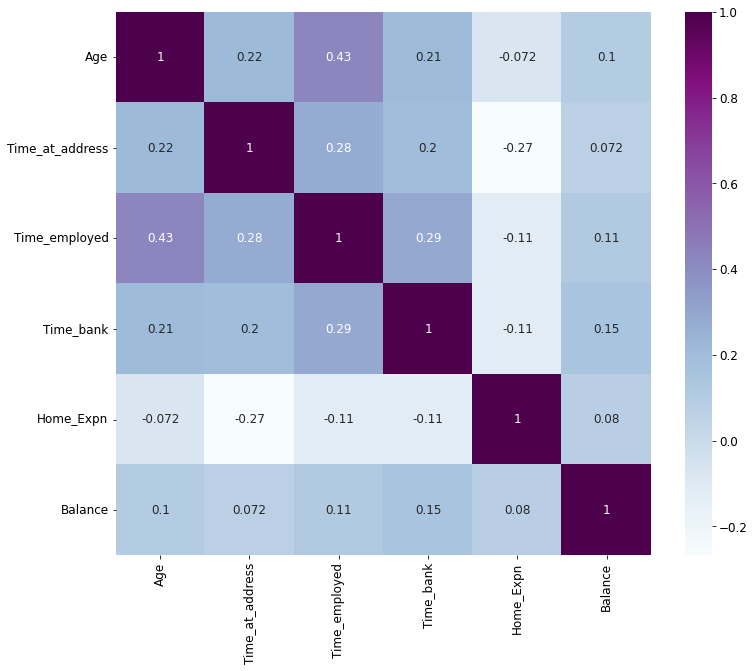

In [77]:
# Plotting the correlation matrix
plt.figure(figsize=(12,10))                                                      
sns.heatmap(correlation,annot=True,cmap='BuPu')

In [78]:
# Specifying the inputs for the model
X=loan_data.iloc[:,:-1]                                                          
X
   

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,M,30.670000,2.500,owner,given,semi_pro,governmen,2,0,t,oth_inst_,340,0
424,M,34.169998,2.750,owner,given,guard_etc,self_empl,2,0,t,given,232,200
425,F,22.250000,1.250,rent,not_given,unemploye,unemploye,3,0,f,given,280,0
426,M,23.330000,1.500,owner,given,creative_,governmen,1,0,f,given,422,200


In [79]:
y=loan_data.iloc[:,-1]
y

0      reject
1      reject
2      accept
3      accept
4      reject
        ...  
423    reject
424    reject
425    reject
426    accept
427    accept
Name: Decision, Length: 428, dtype: object

**Performing One Hot Encoding**

In [80]:
# Performing dummy variables
X=pd.get_dummies(X) 

In [81]:
X

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Sex_F,Sex_M,Res_status_owner,Res_status_rent,...,Job_status_military,Job_status_private_s,Job_status_retired,Job_status_self_empl,Job_status_student,Job_status_unemploye,Liab_ref_f,Liab_ref_t,Acc_ref_given,Acc_ref_oth_inst_
0,50.750000,0.585,0,0,145,0,0,1,1,0,...,0,0,0,0,0,1,1,0,1,0
1,19.670000,10.000,0,0,140,0,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
2,52.830002,15.000,5,14,0,2200,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
3,22.670000,2.540,2,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
4,29.250000,13.000,0,0,228,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,30.670000,2.500,2,0,340,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,1
424,34.169998,2.750,2,0,232,200,0,1,1,0,...,0,0,0,1,0,0,0,1,1,0
425,22.250000,1.250,3,0,280,0,1,0,0,1,...,0,0,0,0,0,1,1,0,1,0
426,23.330000,1.500,1,0,422,200,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0


**Performing Label Encoding on Target Variable**

In [82]:
le=LabelEncoder()                                   
y=pd.DataFrame(le.fit_transform(y),columns=['Decision'])

In [83]:
y

,Decision
0,1
1,1
2,0
3,0
4,1
...,...
423,1
424,1
425,1
426,0


**Concatenated the encoded data back into a dataframe**

In [84]:
encoded_data=pd.concat([X,y],axis=1)
encoded_data

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Sex_F,Sex_M,Res_status_owner,Res_status_rent,...,Job_status_private_s,Job_status_retired,Job_status_self_empl,Job_status_student,Job_status_unemploye,Liab_ref_f,Liab_ref_t,Acc_ref_given,Acc_ref_oth_inst_,Decision
0,50.750000,0.585,0,0,145,0,0,1,1,0,...,0,0,0,0,1,1,0,1,0,1
1,19.670000,10.000,0,0,140,0,0,1,0,1,...,0,0,0,0,0,0,1,1,0,1
2,52.830002,15.000,5,14,0,2200,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
3,22.670000,2.540,2,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
4,29.250000,13.000,0,0,228,0,0,1,1,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,30.670000,2.500,2,0,340,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,1
424,34.169998,2.750,2,0,232,200,0,1,1,0,...,0,0,1,0,0,0,1,1,0,1
425,22.250000,1.250,3,0,280,0,1,0,0,1,...,0,0,0,0,1,1,0,1,0,1
426,23.330000,1.500,1,0,422,200,0,1,1,0,...,0,0,0,0,0,1,0,1,0,0


In [85]:
encoded_data.shape

(428, 36)

**Splitting the Train & Test Data**

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.5,random_state=42,shuffle=True)

In [87]:
print(X_train.shape)
print(X_test.shape)

(214, 35)
(214, 35)


**Scaling Data**
Between -1 to 1


In [88]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)                                                 
X_test=sc.fit_transform(X_test)

# **Kernel Linear**

In [89]:
# Fitting the SVM model
model=svm.SVC(kernel='linear', C=1)
model.fit(X_train,y_train)                                                       

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, kernel='linear')

In [90]:
 # Predicting the test results
y_pred=model.predict(X_test)                                                     

In [91]:
# Displaying the support vector
model.support_vectors_                                                      

array([[-0.6940408 ,  1.42284362, -0.19389886, ..., -0.90197523,
         0.30304576, -0.30304576],
       [-0.47884121,  0.40626284, -0.19389886, ..., -0.90197523,
         0.30304576, -0.30304576],
       [-0.10611552, -0.84526105, -0.55788445, ..., -0.90197523,
         0.30304576, -0.30304576],
       ...,
       [ 3.30867145,  1.08398336,  0.89805789, ..., -0.90197523,
         0.30304576, -0.30304576],
       [-0.37898861,  1.98761072, -0.55788445, ...,  1.10867789,
         0.30304576, -0.30304576],
       [ 2.26796653, -0.87349941, -0.19389886, ...,  1.10867789,
         0.30304576, -0.30304576]])

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[61, 36],
       [18, 99]])

In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.63      0.69        97
           1       0.73      0.85      0.79       117

    accuracy                           0.75       214
   macro avg       0.75      0.74      0.74       214
weighted avg       0.75      0.75      0.74       214



In [94]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7476635514018691

# **Kernel Polynomial**

In [95]:
# Fitting the SVM model
model=svm.SVC(kernel='poly', degree=3)                                            
model.fit(X_train,y_train)       
y_pred=model.predict(X_test)                                                       

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [96]:
# Displaying the support vector
model.support_vectors_

array([[-0.6940408 ,  1.42284362, -0.19389886, ..., -0.90197523,
         0.30304576, -0.30304576],
       [-0.47884121,  0.40626284, -0.19389886, ..., -0.90197523,
         0.30304576, -0.30304576],
       [-0.97380027,  0.51921626, -0.19389886, ..., -0.90197523,
         0.30304576, -0.30304576],
       ...,
       [-0.37898861,  1.98761072, -0.55788445, ...,  1.10867789,
         0.30304576, -0.30304576],
       [-0.701788  , -0.61031794, -0.55788445, ...,  1.10867789,
         0.30304576, -0.30304576],
       [ 2.26796653, -0.87349941, -0.19389886, ...,  1.10867789,
         0.30304576, -0.30304576]])

In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

[[ 53  44]
 [ 17 100]]
0.7149532710280374


In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.55      0.63        97
           1       0.69      0.85      0.77       117

    accuracy                           0.71       214
   macro avg       0.73      0.70      0.70       214
weighted avg       0.72      0.71      0.71       214



In [99]:
from sklearn.svm import SVC
model=svm.SVC(C=10,kernel='rbf', gamma=0.01)                                           
model.fit(X_train,y_train)       
y_pred=model.predict(X_test)  

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

[[65 32]
 [26 91]]
0.7289719626168224


In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69        97
           1       0.74      0.78      0.76       117

    accuracy                           0.73       214
   macro avg       0.73      0.72      0.72       214
weighted avg       0.73      0.73      0.73       214



In [102]:
# plt.figure(figsize=(5,5)) 
# axis = plt.gca()
# plt.scatter(loan_data.iloc[:, 0], loan_data.iloc[:, 1], c=loan_data.iloc[:, 2], s=50, cmap='autumn')
# xlim = axis.get_xlim()
# ylim = axis.get_ylim()

# xx = np.linspace(xlim[0], xlim[1], 30)
# yy = np.linspace(ylim[0], ylim[1], 30)
# YY, XX = np.meshgrid(yy, xx)
# xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Z = model.decision_function(xy).reshape(XX.shape)

# axis.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
#            linestyles=['--', '-', '--'])

# axis.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
#            linewidth=1, facecolors='none', edgecolors='k')
# plt.show()

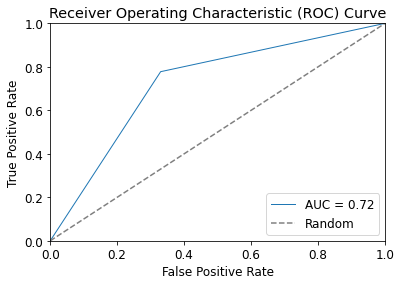

In [104]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# y_true contains the true labels, and y_pred_prob contains the predicted probabilities of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, lw=1, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()